In [1]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.46MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.25MB/s]


In [3]:
image,label=train_dataset[0]
print("Image shape:",image.shape)
print("Number of training samples:",len(train_dataset))

Image shape: torch.Size([1, 28, 28])
Number of training samples: 60000


In [4]:
image,label=test_dataset[0]
print("Image shape:",image.shape)
print("Number of testing samples:",len(test_dataset))
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

Image shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [5]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(128*3*3,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=self.pool(t.relu(self.conv1(x)))
    x=self.pool(t.relu(self.conv2(x)))
    x=self.pool(t.relu(self.conv3(x)))
    x=x.view(x.size(0),-1)
    x=nn.functional.relu(self.fc1(x))
    x=nn.functional.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [7]:
from torchsummary import summary
model=CNNClassifier()
if t.cuda.is_available():
  device=t.device("cuda")
  model.to(device)
print("Name: Manisha selvakumari.S.S.")
print("Reg.no: 212223220055")
summary(model,input_size=(1,28,28))
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
def train_model(model,train_loader,num_epochs):
  for epoch in range(num_epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
      if t.cuda.is_available():
        images,labels=images.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
print("Name: Manisha selvakumari.S.S.")
print("Reg.no: 212223220055")

Name: Manisha selvakumari.S.S.
Reg.no: 212223220055
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (M

In [12]:
train_model(model,train_loader,num_epochs=10)

Epoch [1/10], Loss: 0.0232
Epoch [2/10], Loss: 0.0190
Epoch [3/10], Loss: 0.0161
Epoch [4/10], Loss: 0.0133
Epoch [5/10], Loss: 0.0137
Epoch [6/10], Loss: 0.0113
Epoch [7/10], Loss: 0.0095
Epoch [8/10], Loss: 0.0078
Epoch [9/10], Loss: 0.0096
Epoch [10/10], Loss: 0.0077


In [13]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with t.no_grad():
    for images, labels in test_loader:
      if t.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = t.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

In [17]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with t.no_grad():
    for images, labels in test_loader:
      if t.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = t.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())
  # Return correct and total
  return correct, total

# Call the function and unpack the returned values
correct, total = test_model(model, test_loader)

accuracy = correct/total
print("Name: Manisha selvakumari.S.S.")
print("Register No: 212223220055")
print(f"Test Accuracy: {accuracy:.4f}")

Name: Manisha selvakumari.S.S.
Register No: 212223220055
Test Accuracy: 0.9916


Name: Manisha selvakumari.S.S.
Register No: 212223220055
Test Accuracy: 0.9916
Name: Manisha selvakumari.S.S.
Register No: 212223220055


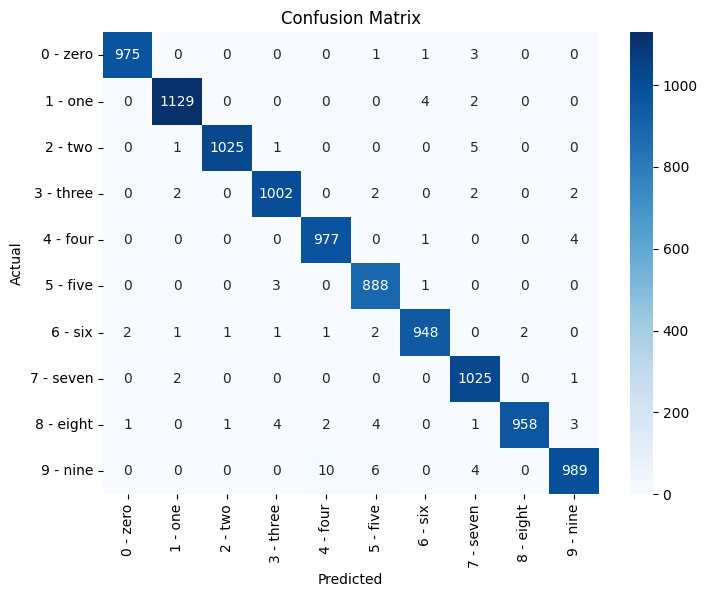

In [19]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with t.no_grad():
    for images, labels in test_loader:
      if t.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = t.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())
  # Return correct, total, all_labels, and all_preds
  return correct, total, all_labels, all_preds

# Call the function and unpack the returned values, including all_labels and all_preds
correct, total, all_labels, all_preds = test_model(model, test_loader)

accuracy = correct/total
print("Name: Manisha selvakumari.S.S.")
print("Register No: 212223220055")
print(f"Test Accuracy: {accuracy:.4f}")

# Now all_labels and all_preds are available in the global scope for the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
print("Name: Manisha selvakumari.S.S.")
print("Register No: 212223220055")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("Name: Manisha selvakumari.S.S.")
print("Register No: 212223220055")
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))
test_model(model, test_loader)

Name: Manisha selvakumari.S.S.
Register No: 212223220055
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



(9916,
 10000,
 [np.int64(7),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(4),
  np.int64(1),
  np.int64(4),
  np.int64(9),
  np.int64(5),
  np.int64(9),
  np.int64(0),
  np.int64(6),
  np.int64(9),
  np.int64(0),
  np.int64(1),
  np.int64(5),
  np.int64(9),
  np.int64(7),
  np.int64(3),
  np.int64(4),
  np.int64(9),
  np.int64(6),
  np.int64(6),
  np.int64(5),
  np.int64(4),
  np.int64(0),
  np.int64(7),
  np.int64(4),
  np.int64(0),
  np.int64(1),
  np.int64(3),
  np.int64(1),
  np.int64(3),
  np.int64(4),
  np.int64(7),
  np.int64(2),
  np.int64(7),
  np.int64(1),
  np.int64(2),
  np.int64(1),
  np.int64(1),
  np.int64(7),
  np.int64(4),
  np.int64(2),
  np.int64(3),
  np.int64(5),
  np.int64(1),
  np.int64(2),
  np.int64(4),
  np.int64(4),
  np.int64(6),
  np.int64(3),
  np.int64(5),
  np.int64(5),
  np.int64(6),
  np.int64(0),
  np.int64(4),
  np.int64(1),
  np.int64(9),
  np.int64(5),
  np.int64(7),
  np.int64(8),
  np.int64(9),
  np.int64(3),
  np.int64(7),
  np.int64

Name:Manisha selvakumari.S.S.
Reg no: 212223220055


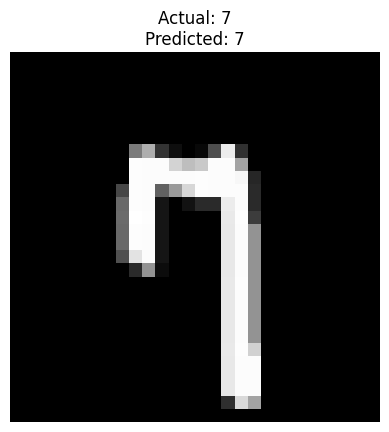

Actual: 7
Predicted: 7


In [26]:
# Define the predict_image function
def predict_image(model, image_index, dataset):
    # Get the image and label from the dataset
    image, label = dataset[image_index]

    # Move the model to the appropriate device (CPU or GPU)
    device = next(model.parameters()).device

    # Ensure the image is on the correct device for prediction
    image_on_device = image.unsqueeze(0).to(device)

    # Perform inference within the no_grad context
    with t.no_grad():
        output = model(image_on_device)
        _, predicted = t.max(output, 1)

    # Define class names
    class_names = [str(i) for i in range(10)]

    # Print student information
    print("Name:Manisha selvakumari.S.S.")
    print("Reg no: 212223220055")

    # Plot the image with actual and predicted labels
    plt.imshow(image.cpu().squeeze(0), cmap='gray')
    plt.title(f"Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}")
    plt.axis("off")
    plt.show()

    # Print the actual and predicted labels
    print(f"Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}")

# Call the predict_image function as intended
predict_image(model, image_index=80, dataset=test_dataset)